# Overview

**Sentiment Analysis in Hotel Reviews**

Creating a helpful tool for hotel owners to figure out what they can do to make their hotel better. This tool looks at different things like customer feedback and operational data to give clear advice on what changes can be made to improve guests' experiences and make the hotel run smoother.

**Roadmap**

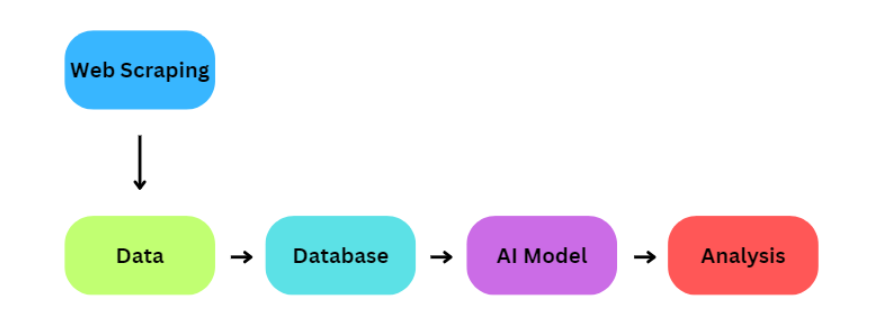

# Initialization

## Libraries

In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.common.exceptions import NoSuchElementException

# Custom function
from CrawlingData import CrawlingData
from seleniumFunction import idData,gethotelId,scrollPage

## Import packages

In [2]:
import pandas as pd
import time
import numpy as np

## Web Scraping

We choose *agoda.com* website to crawling because its informative. 

The link is `"https://www.agoda.com/vi-vn/country/vietnam.html?site_id=1891474&tag=fe872c99-9477-72c0-54cf-6841dc26bb51&gad_source=1&device=c&network=g&adid=683003463985&rand=6822283655025895958&expid=&adpos=&aud=kwd-4997135212&gclid=EAIaIQobChMIwYTniPnwhAMVPix7Bx2zCAo8EAAYASAAEgKRtvD_BwE&pslc=1")
`

In [38]:
from selenium.webdriver.chrome.options import Options

chrome_options = Options()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')  # Required when running as root user. Otherwise, you would get no sandbox errors.

In [4]:
df = CrawlingData()

### Cities data


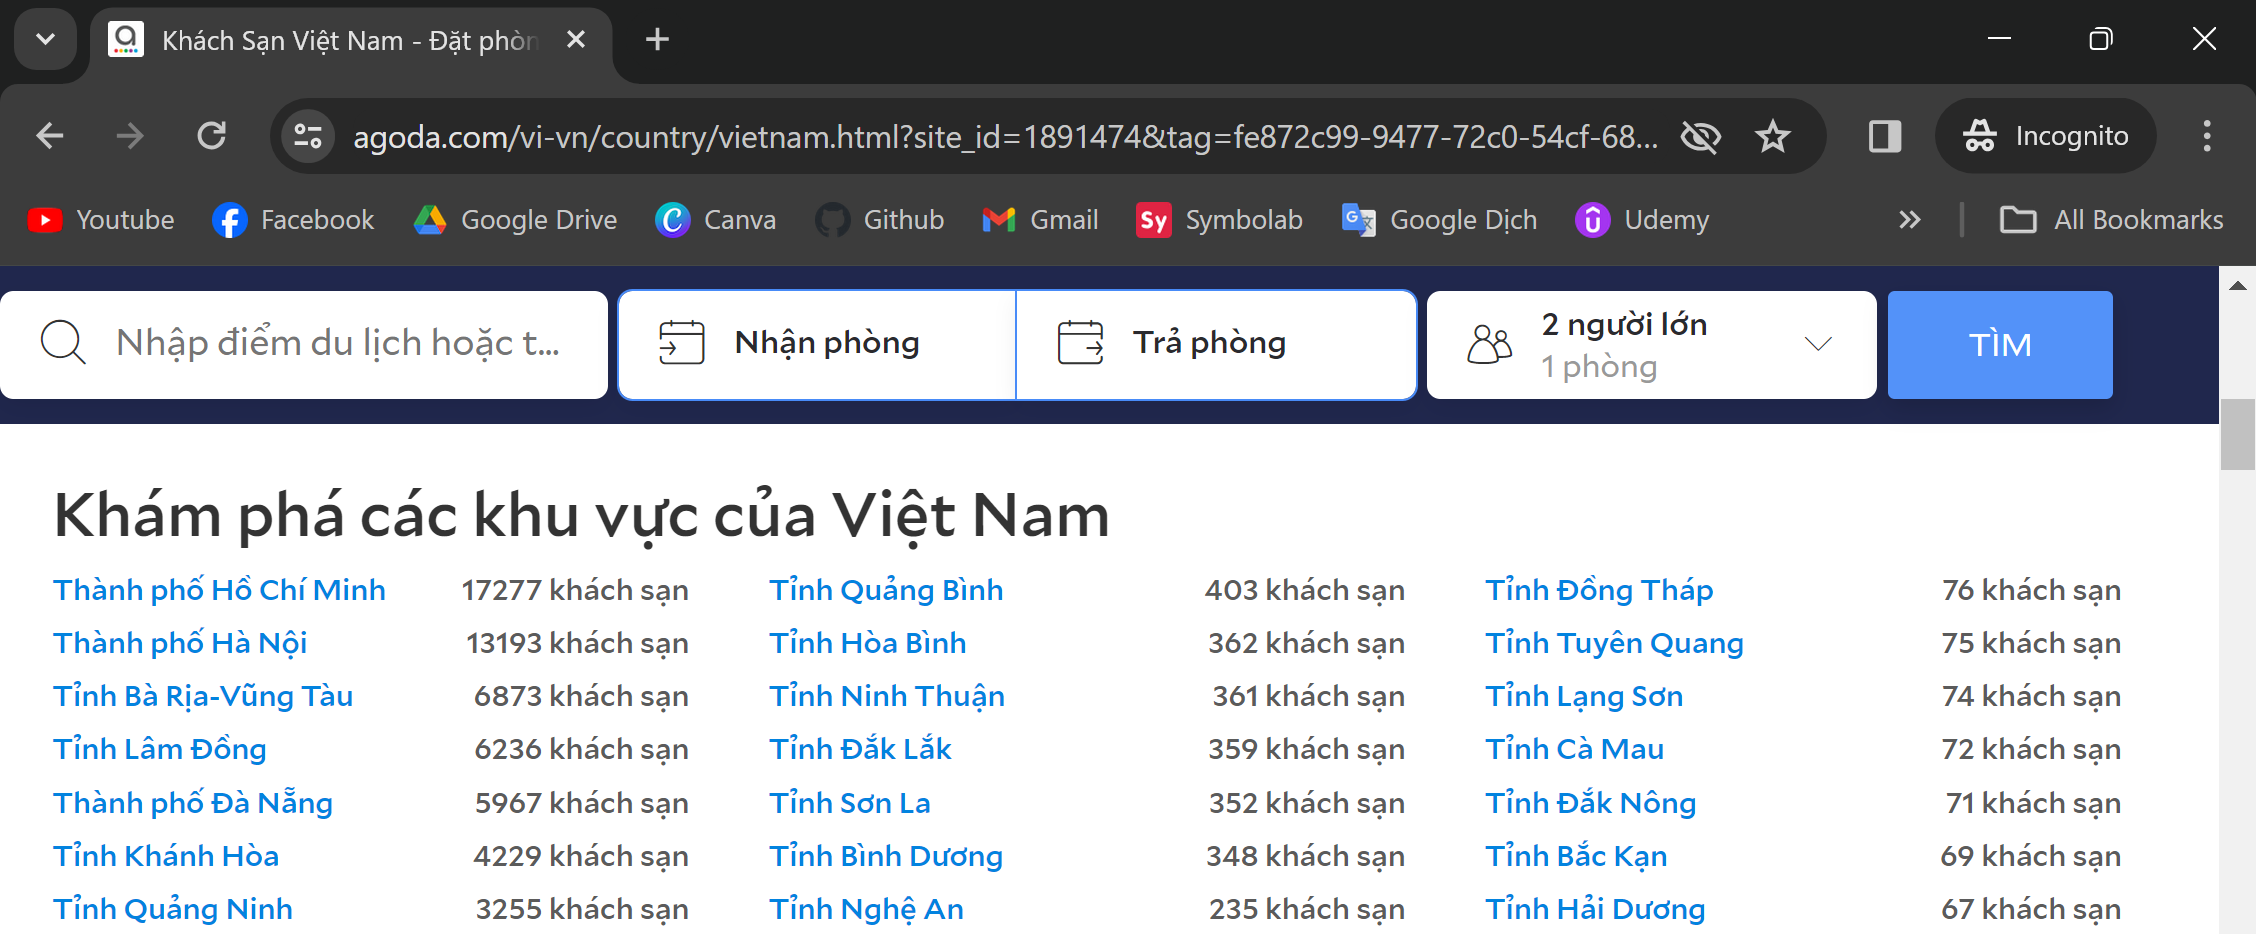

`citiesData` retrieves all the links to webpages associated with specific cities or provinces.

In [6]:
df.citiesData

,cityName,cityLink
0,Thành phố Hồ Chí Minh,https://www.agoda.com/vi-vn/region/ho-chi-minh...
1,Thành phố Hà Nội,https://www.agoda.com/vi-vn/region/ha-noi-prov...
2,Tỉnh Bà Rịa-Vũng Tàu,https://www.agoda.com/vi-vn/region/ba-ria-vung...
3,Tỉnh Lâm Ðồng,https://www.agoda.com/vi-vn/region/lam-dong-pr...
4,Thành phố Ðà Nẵng,https://www.agoda.com/vi-vn/region/da-nang-pro...
...,...,...
58,Tỉnh Bình Phước,https://www.agoda.com/vi-vn/region/binh-phuoc-...
59,Tỉnh Hà Nam,https://www.agoda.com/vi-vn/region/ha-nam-prov...
60,Tỉnh Nam Ðịnh,https://www.agoda.com/vi-vn/region/nam-dinh-pr...
61,Tỉnh Trà Vinh,https://www.agoda.com/vi-vn/region/tra-vinh-pr...


### Section data


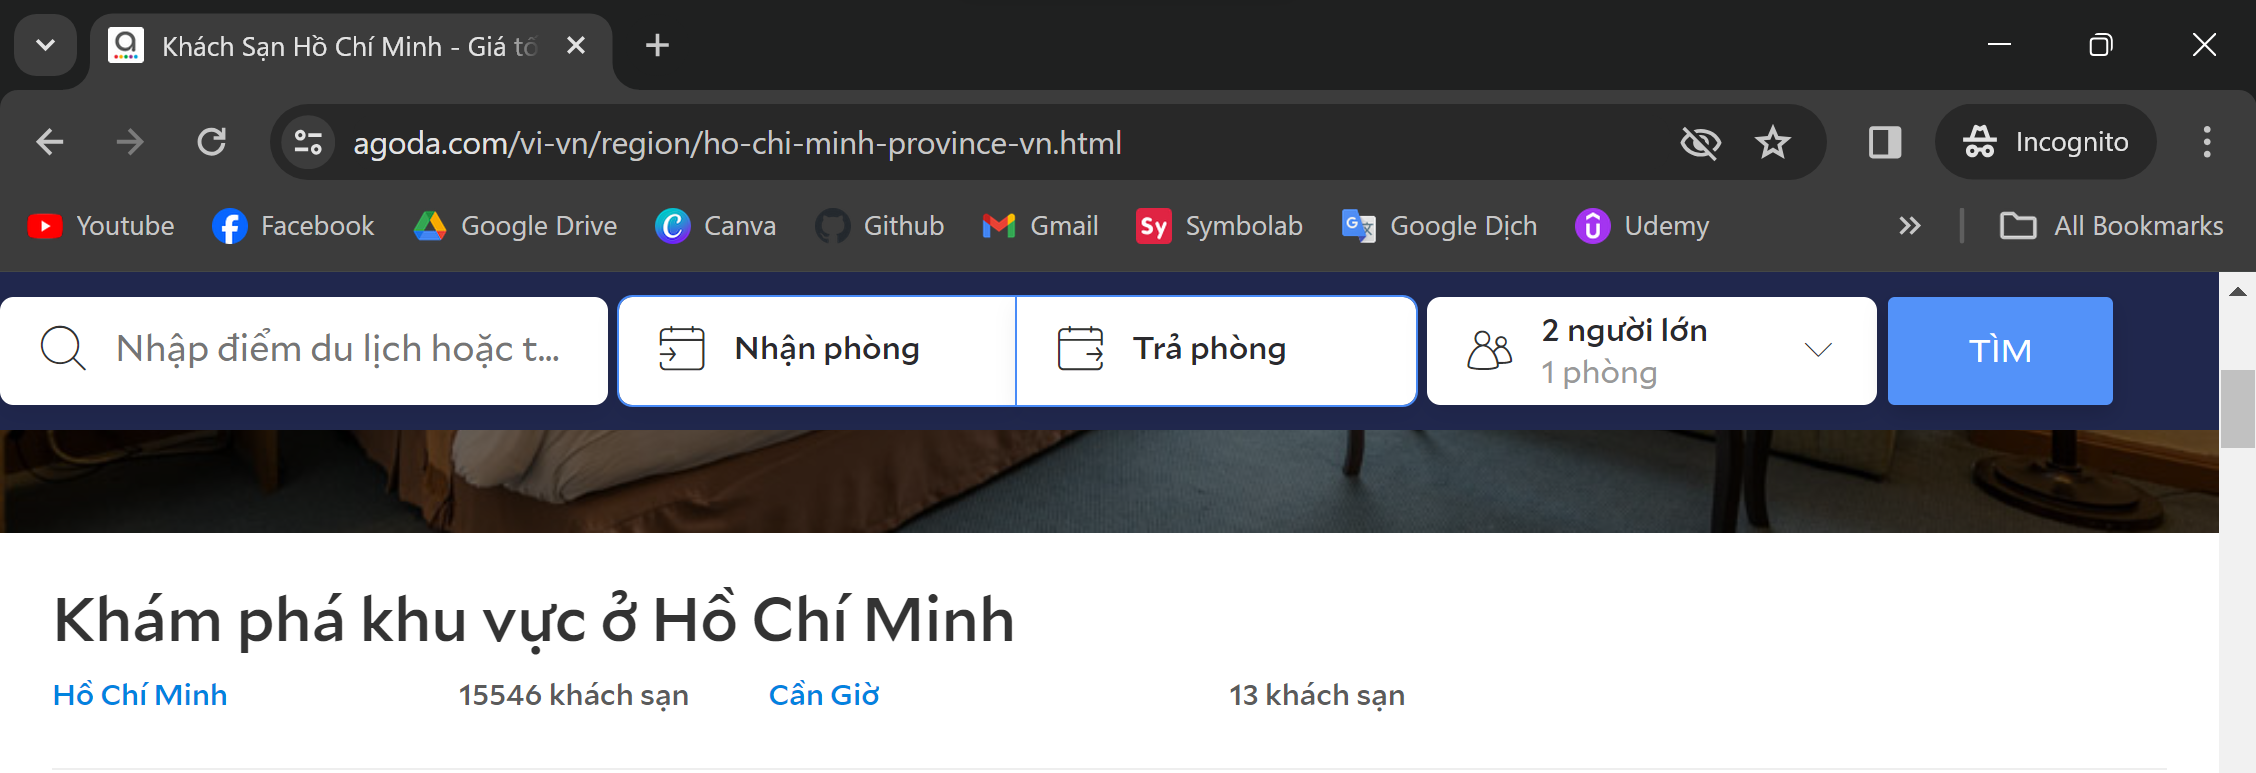

As observed, each element within `citiesData` contains multiple smaller sections.


So, `sectionData` displays all the sections inside, each containing values for up to **204 elements**.

In [7]:
df.sectionData

,sectionName,cityName,sectionLink
0,Hồ Chí Minh,Thành phố Hồ Chí Minh,https://www.agoda.com/vi-vn/city/ho-chi-minh-c...
1,Cần Giờ,Thành phố Hồ Chí Minh,https://www.agoda.com/vi-vn/city/can-gio-vn.html
2,Hà Nội,Thành phố Hà Nội,https://www.agoda.com/vi-vn/city/hanoi-vn.html
3,Gia Lâm,Thành phố Hà Nội,https://www.agoda.com/vi-vn/city/gia-lam-vn.html
4,Xuân Bảng,Thành phố Hà Nội,https://www.agoda.com/vi-vn/city/xuan-bang-vn....
...,...,...,...
200,Trà Vinh,Tỉnh Trà Vinh,https://www.agoda.com/vi-vn/city/tra-vinh-vn.html
201,Cầu Kè,Tỉnh Trà Vinh,https://www.agoda.com/vi-vn/city/cau-ke-vn.html
202,Nguyệt Hạng,Tỉnh Trà Vinh,https://www.agoda.com/vi-vn/city/nguyet-hang-v...
203,Lai Châu,Tỉnh Lai Châu,https://www.agoda.com/vi-vn/city/lai-chau-vn.html


In the `sectionData`, we provided a link to the website. However, to access all the hotel IDs, we will need to navigate to another webpage.

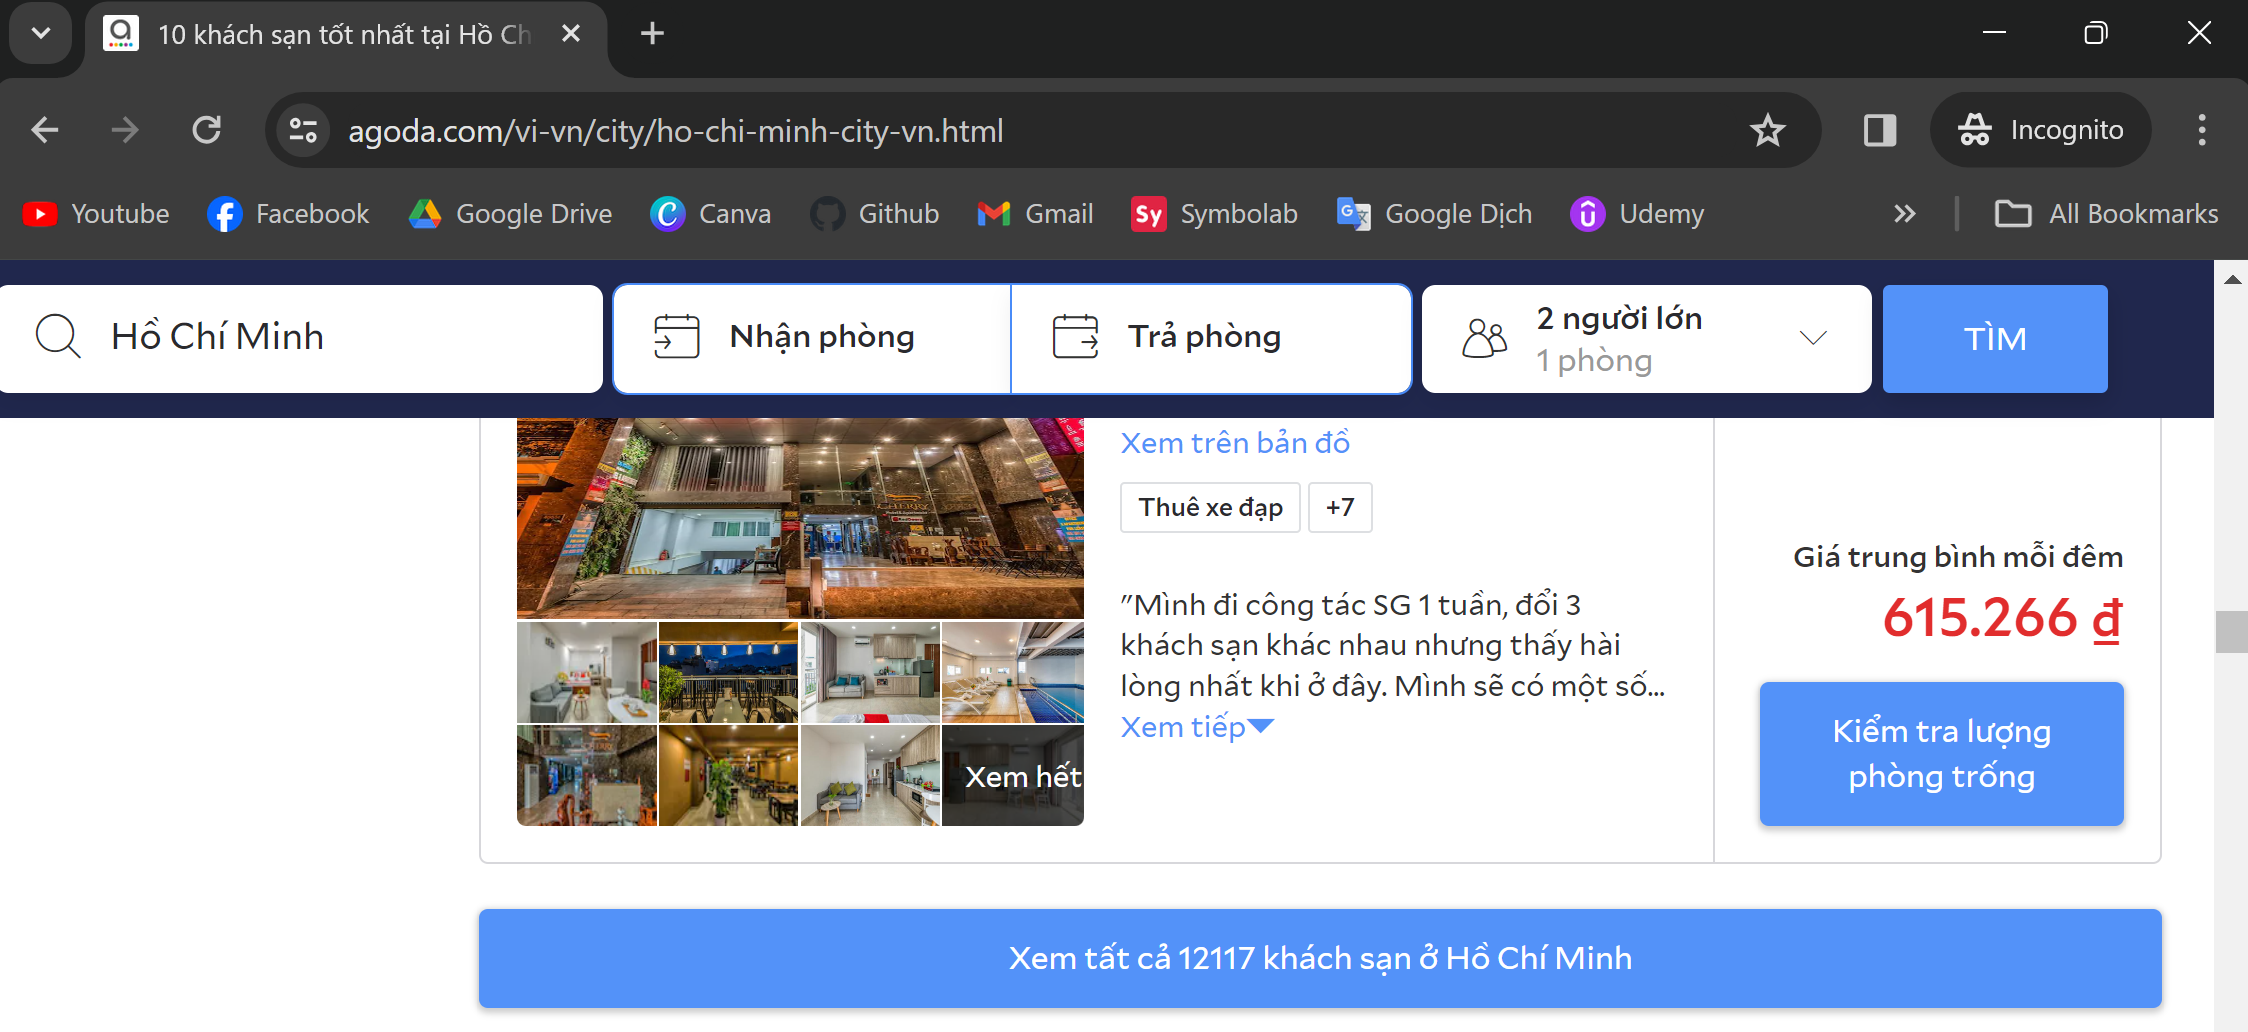

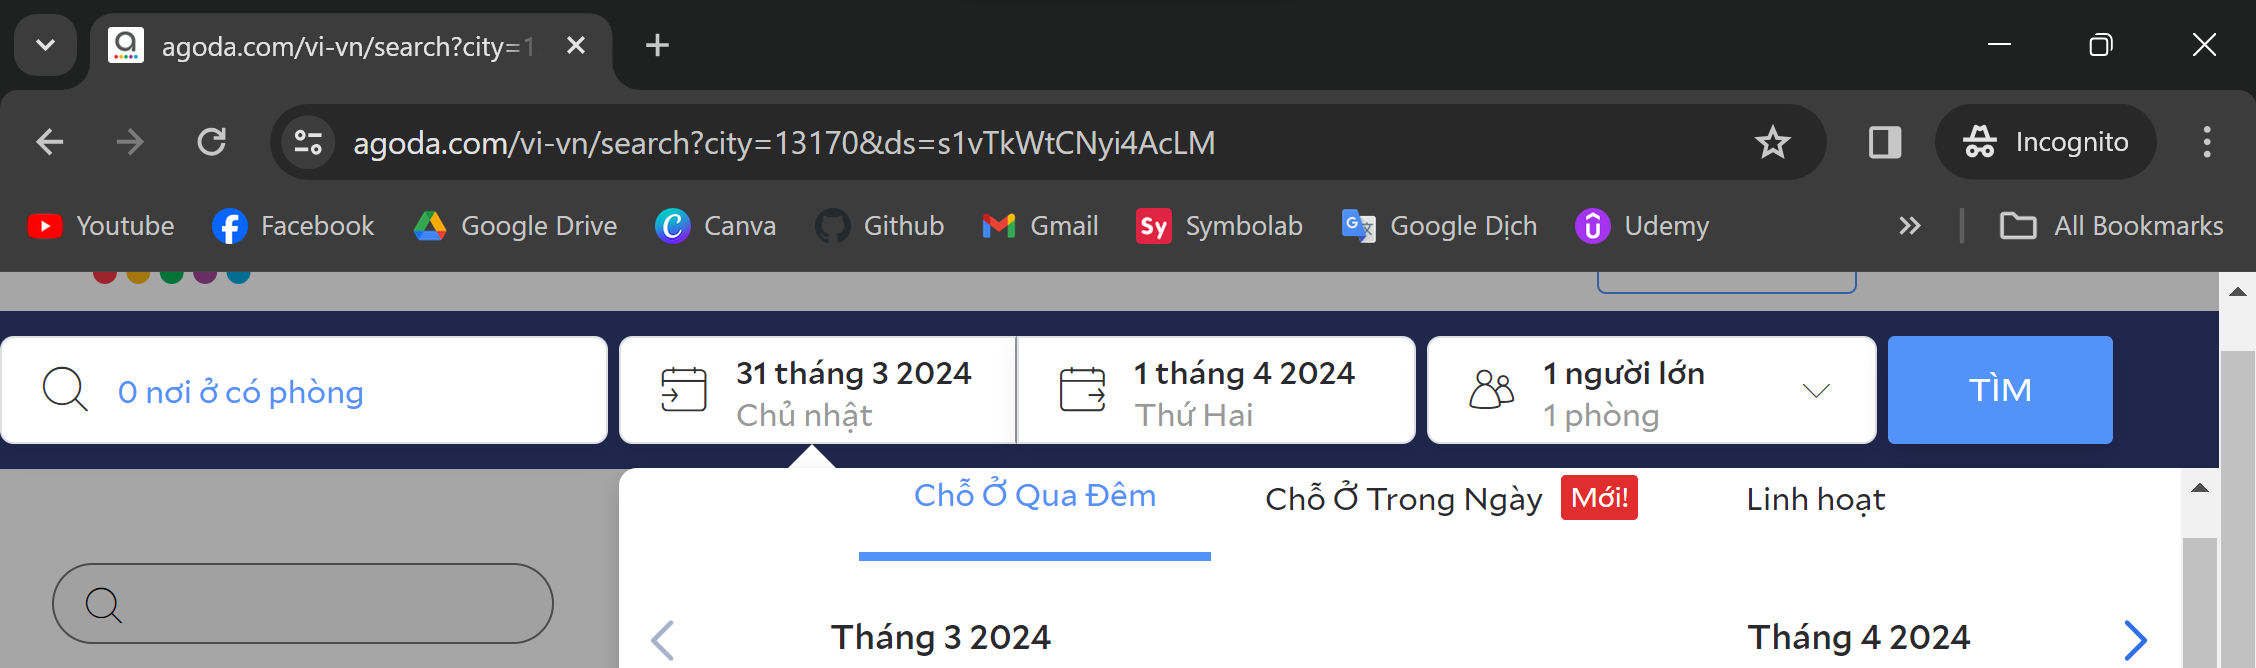

Because clicking on a specific button is required rather than being provided with a direct link, we need to create another column called `edited_sectionLink`. This column will contain a link that, when clicked, will retrieve all the hotel IDs.

However, there are still some errors to handle in this process. Since not all webpages have the same XPath, we need to use a try-except formula in Python to handle these variations.

*P/s: I got stuck at this for like 3 days :(*

- My solution involves creating a function to add a new column next to the `sectionLink`. 
- However, not all sections contain a hotel ID. This might be due to the duration specified, such as **Chỗ ở qua đêm** representing the date of stay. 
- I've chosen to exclude these sections to focus on available hotels for simplicity. However, this exclusion might lead to sections with no available hotels for that day. 
- As a result, the webpage returned may be blank with no button to click on, causing the entire process to crash. To address this issue, we need to handle it using the `NoSuchElementException`.

In [6]:
from selenium.common.exceptions import WebDriverException, NoSuchElementException

def getsectionLink(link):
    driver = webdriver.Chrome()
    try: 
        driver.get(link)
        backdrop = driver.find_element(By.CSS_SELECTOR, ".SearchboxBackdrop")
        # Execute JavaScript to remove the element from the DOM
        driver.execute_script("arguments[0].parentNode.removeChild(arguments[0]);", backdrop)
        time.sleep(5)
        button = driver.find_element(By.XPATH, '//*[@id="contentReact"]/article/div[1]/div/div[2]/div[3]/button/div')
        button.click();
    except NoSuchElementException as e:
        return 0
    except WebDriverException as e:
        return 1
    time.sleep(5)
    current_url = driver.current_url
    return current_url

*P/s: One more issue in this code is that when I add options to run Chrome in **headless mode**, it **fails to find the XPath** element. Therefore, I left the webpage open instead.*

In [40]:
df.sectionData.sectionLink[0]

'https://www.agoda.com/vi-vn/city/ho-chi-minh-city-vn.html'

In [44]:
getsectionLink(df.sectionData.sectionLink[0])

'https://www.agoda.com/vi-vn/search?city=13170'

In [42]:
getsectionLink("https://www.google.com/")

0

This function returns only the edited link of each of `sectionLink`. 

In [43]:
getsectionLink("http://ahasdhashdhasdhasdhahsdhasd.com/")

1

In [ ]:
import pandas as pd

# Read the existing CSV file into a DataFrame
existing_data = pd.read_csv('existing_file.csv')

# Specify the value from an existing column to determine where to add the new column
existing_column_value = 'Value1'  # For example, using a value from an existing column

# Find the index of the row where the existing column has the specified value
index_to_add_column = existing_data.index[existing_data['Existing_Column'] == existing_column_value][0]

# Add a new column with the desired value at the specified row
new_column_value = 'New Value'
existing_data.loc[index_to_add_column, 'New_Column'] = new_column_value

# Write the updated DataFrame back to the CSV file
existing_data.to_csv('existing_file.csv', index=False)

In [68]:
sample_df['edited_sectionLink']

0       
1       
2       
3       
4       
      ..
200     
201     
202     
203     
204     
Name: edited_sectionLink, Length: 205, dtype: object

In [12]:
# sample_df = df.sectionData 
# sample_df['edited_sectionLink'] = ''
sample_df = pd.read_csv('sectionData1.csv')

for sectionLink in df.sectionData.sectionLink:
    index_to_add_column = sample_df.index[sample_df['sectionLink'] == sectionLink][0]
    if sample_df['edited_sectionLink'][index_to_add_column] in ['0', '1', '']:
        sample_df.loc[index_to_add_column, 'edited_sectionLink'] = getsectionLink(sectionLink)
        sample_df.to_csv('sectionData1.csv', index=False, encoding='utf-8-sig')


In [7]:
sample_df = pd.read_csv('sectionData1.csv')


In [112]:
for sectionLink in df.sectionData.sectionLink:
    index_to_add_column = sample_df.index[sample_df['sectionLink'] == sectionLink][0]
    if sample_df['edited_sectionLink'][index_to_add_column] in ['0', '1', '']:
        sample_df.loc[index_to_add_column, 'edited_sectionLink'] = 'changed'

        

In [113]:
sample_df

,sectionName,cityName,sectionLink,edited_sectionLink
0,Hồ Chí Minh,Thành phố Hồ Chí Minh,https://www.agoda.com/vi-vn/city/ho-chi-minh-c...,changed
1,Cần Giờ,Thành phố Hồ Chí Minh,https://www.agoda.com/vi-vn/city/can-gio-vn.html,https://www.agoda.com/vi-vn/search?city=88775
2,Hà Nội,Thành phố Hà Nội,https://www.agoda.com/vi-vn/city/hanoi-vn.html,changed
3,Gia Lâm,Thành phố Hà Nội,https://www.agoda.com/vi-vn/city/gia-lam-vn.html,changed
4,Xuân Bảng,Thành phố Hà Nội,https://www.agoda.com/vi-vn/city/xuan-bang-vn....,changed
...,...,...,...,...
200,Trà Vinh,Tỉnh Trà Vinh,https://www.agoda.com/vi-vn/city/tra-vinh-vn.html,changed
201,Cầu Kè,Tỉnh Trà Vinh,https://www.agoda.com/vi-vn/city/cau-ke-vn.html,changed
202,Nguyệt Hạng,Tỉnh Trà Vinh,https://www.agoda.com/vi-vn/city/nguyet-hang-v...,changed
203,Lai Châu,Tỉnh Lai Châu,https://www.agoda.com/vi-vn/city/lai-chau-vn.html,https://www.agoda.com/vi-vn/search?city=18867


In [74]:
 sample_df.index[sample_df['sectionLink'] == sectionLink]

Int64Index([204], dtype='int64')

In [60]:
sample_df['edited_sectionLink'][0] not in [0, 1, None]

True

### Hotel data


In [18]:
# # sectionsLink = ['https://www.agoda.com/vi-vn/city/ho-chi-minh-city-vn.html']
driver = webdriver.Chrome()
driver.get('https://www.agoda.com/vi-vn/city/ho-chi-minh-city-vn.html')

backdrop = driver.find_element(By.CSS_SELECTOR, ".SearchboxBackdrop")
# Execute JavaScript to remove the element from the DOM
driver.execute_script("arguments[0].parentNode.removeChild(arguments[0]);", backdrop)

time.sleep(5)
button = driver.find_element(By.XPATH, '//*[@id="contentReact"]/article/div[1]/div/div[2]/div[3]/button/div')
button.click();

In [34]:
getsectionLink('https://www.agoda.com/vi-vn/city/ho-chi-minh-city-vn.html')

'https://www.agoda.com/vi-vn/search?city=13170&ds=K6jPvDnt49kAkH%2Fu'